In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [16]:
import pandas as pd

#baca file CSV dari drive
data = pd.read_csv('/content/Salary_Data_Simple_SVR.csv')

#lakukan operasi lainnya sesuai kebutuhan

In [17]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [23]:
X=data.iloc[:, :-1].values
y=data.iloc[:, -1].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 49830096.85590839


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

#Hitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#Hitung MAE
mae = mean_absolute_error(y_test, y_pred)

#Hitung MAPE
def mean_absolute_percentage_error(y_true,y_pred):
     return np.mean(np.abs((y_true,y_pred)/y_true)) * 100
mape = mean_absolute_percentage_error(y_test,y_pred)

#Htiung R^2
r2 = r2_score (y_test, y_pred)

print("Root Mean Squared Error (RMSE):",rmse)
print("Mean Absolute Error (MAE):",mae)
print("Mean Absolute Percentage Error (MAPE):",mape)
print("R^2 Score:", r2)

Root Mean Squared Error (RMSE): 7059.04362190151
Mean Absolute Error (MAE): 6286.453830757749
Mean Absolute Percentage Error (MAPE): 98.34234971001675
R^2 Score: 0.9024461774180497


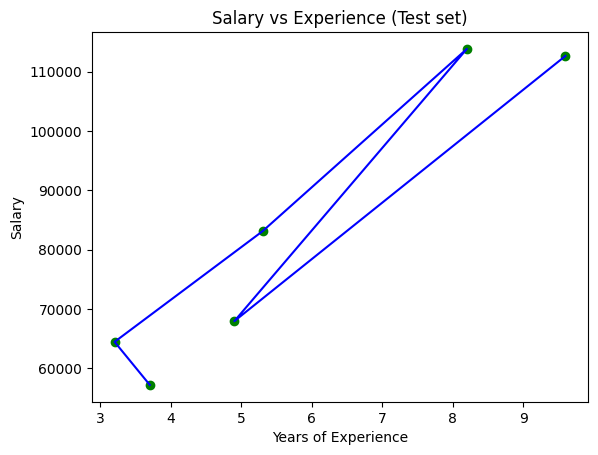

In [34]:
plt.scatter(X_test,y_test,color='green')
plt.plot(X_test,y_test,color='blue')
plt.title("Salary vs Experience (Test set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

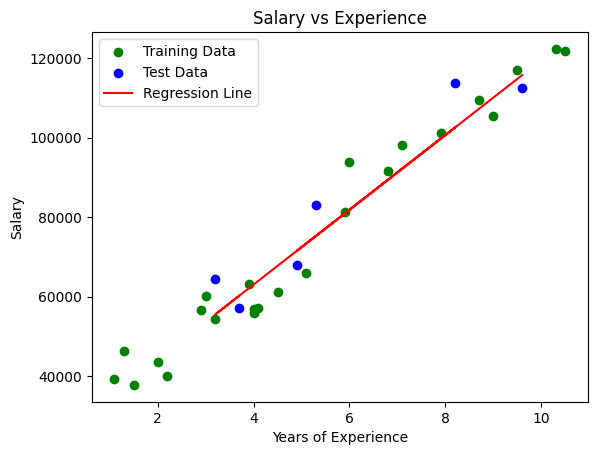

In [35]:
import matplotlib.pyplot as plt

#Visualisasi data train
plt.scatter(X_train,y_train,color ='green', label ='Training Data')

#Visualisasi Data test
plt.scatter(X_test,y_test, color='blue', label='Test Data')

#Visualisasi Garis Regresi
plt.plot(X_test,y_pred, color='red', label='Regression Line')

plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [41]:
df_comparison = pd.DataFrame({'Actual': y_test, 'Presdicted' : y_pred})
df_comparison

,Actual,Presdicted
0,112635,115790.210113
1,67938,71498.278095
2,113812,102596.868661
3,83088,75267.804224
4,64445,55477.792045
5,57189,60189.699707


In [43]:
df_test = pd.DataFrame(X_test,columns=['YearsExperience'])
df_test['Actual']=y_test
df_test['Predicted']=y_pred
df_test

,YearsExperience,Actual,Predicted
0,9.6,112635,115790.210113
1,4.9,67938,71498.278095
2,8.2,113812,102596.868661
3,5.3,83088,75267.804224
4,3.2,64445,55477.792045
5,3.7,57189,60189.699707


In [44]:
new_data= np.array([[10]])
predicted_salary=model.predict(new_data)
print("Predicted Salary :", predicted_salary)

Predicted Salary : [119559.73624209]
